<a href="https://colab.research.google.com/github/blackfox2001/bmstu/blob/master/tmo2022/laba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 3**

## Задание

Выбрать набор данных (датасет) для решения задачи классификации или регрессии.

С использованием метода train_test_split разделить выборку на обучающую и тестовую.

Обучить модель ближайших соседей для произвольно заданного гиперпараметра K. Оценить качество модели с помощью подходящих для задачи метрик.

Произвести подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оценить качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.

Сравнить метрики качества исходной и оптимальной моделей.

## Выбор и загрузка данных

В качестве датасета будем использовать набор данных, содержащий данные о различных стёклах. Данный набор доступен по адресу: https://www.kaggle.com/datasets/uciml/glass

Набор данных имеет следующие атрибуты:

RI - Refractive Index - коэффициент преломления

Na - Sodium - Содержание натрия (массовый процент в соответствующем оксиде)

Mg - Magnesium - Содержание магния

Al - Aluminum - Содержание алюминия

Si - Silicon - Содержание кремния
K - Potassium - Содержание калия

Ca - Calcium - Содержание кальция

Ba - Barium - Содеражние бария

Fe - Iron - Содержание железа

Type - Type of glass - тип стекла (1, 2 - стекла для зданий, 3, 4 - стекла для автомобилей, 5 - стеклотара, 6 - бытовые стекла, 7 - стекла для ламп; 4 отсутствует в данном наборе данных)

Импортируем библиотеки

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
sns.set(style="ticks")

Загружаем данные

In [4]:
files.upload()

Saving glass.csv to glass.csv


{'glass.csv': b'RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type\r\n1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1\r\n1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1\r\n1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1\r\n1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1\r\n1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1\r\n1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1\r\n1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0,0,1\r\n1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0,1\r\n1.51918,14.04,3.58,1.37,72.08,0.56,8.3,0,0,1\r\n1.51755,13,3.6,1.36,72.99,0.57,8.4,0,0.11,1\r\n1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0,0.24,1\r\n1.51763,12.8,3.66,1.27,73.01,0.6,8.56,0,0,1\r\n1.51589,12.88,3.43,1.4,73.28,0.69,8.05,0,0.24,1\r\n1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0,0.17,1\r\n1.51763,12.61,3.59,1.31,73.29,0.58,8.5,0,0,1\r\n1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0,0,1\r\n1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0,0,1\r\n1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0,0,1\r\n1.51911,13.9,3.73,1.18,72.12,0.06,8.89,0,0,1\r\n1.51735,13.02,3.54,1.

In [5]:
data = pd.read_csv('glass.csv')

Первые 5 строк датасета:

In [6]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Размер датасета:

In [7]:
data.shape

(214, 10)

## Разделение данных

Сначала разделим на данные целевого признака и на остальные данные:

In [8]:
X = data.drop("Type", axis=1)
y = data["Type"]

In [9]:
print(X.head(), "\n")
print(y.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0 

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


In [10]:
print(X.shape)
print(y.shape)

(214, 9)
(214,)


Разделим выборку с помощью функции train_test_split:

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [13]:
X_train.shape, y_train.shape

((160, 9), (160,))

In [14]:
X_test.shape, y_test.shape

((54, 9), (54,))

В выборках остались все типы стекол, доступные в изначальном датасете (4 отсутствует в исходном):

In [15]:
np.unique(y_train)

array([1, 2, 3, 5, 6, 7])

In [16]:
np.unique(y_test)

array([1, 2, 3, 5, 6, 7])

Проверим распределение типов стекол:

In [18]:
from typing import Dict, Tuple

In [19]:
def type_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    labels, counts = np.unique(array, return_counts=True)
    counts_perc = counts/array.size
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_type_proportions(array: np.ndarray):
    proportions = type_proportions(array)
    if len(proportions)>0:
        print('Тип \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [20]:
print_type_proportions(data.Type)

Тип 	 Количество 	 Процент встречаемости
1 	 70 	 	 32.71%
2 	 76 	 	 35.51%
3 	 17 	 	 7.94%
5 	 13 	 	 6.07%
6 	 9 	 	 4.21%
7 	 29 	 	 13.55%


In [21]:
print_type_proportions(y_train)

Тип 	 Количество 	 Процент встречаемости
1 	 47 	 	 29.38%
2 	 60 	 	 37.5%
3 	 10 	 	 6.25%
5 	 12 	 	 7.5%
6 	 8 	 	 5.0%
7 	 23 	 	 14.37%


In [22]:
print_type_proportions(y_test)

Тип 	 Количество 	 Процент встречаемости
1 	 23 	 	 42.59%
2 	 16 	 	 29.63%
3 	 7 	 	 12.96%
5 	 1 	 	 1.85%
6 	 1 	 	 1.85%
7 	 6 	 	 11.11%


Пропорции примерно сохранились.

## Построение модели ближайших соседей

Пусть гиперпараметр будет равен 10, построим модель:

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
clf_i = KNeighborsClassifier(n_neighbors=10)
clf_i.fit(X_train, y_train)
target_i = clf_i.predict(X_test)
len(target_i), target_i

(54, array([5, 7, 5, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 7,
        2, 1, 1, 1, 2, 2, 2, 1, 5, 7, 1, 1, 1, 2, 1, 1, 5, 1, 1, 7, 7, 1,
        7, 1, 1, 1, 2, 7, 1, 2, 1, 2]))

## Кросс-валидация и подбор гиперпараметра

**Кросс-валидация**

In [25]:
from sklearn.model_selection import cross_val_score, cross_validate

In [26]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Type, cv=3)
scores

array([0.91666667, 0.95774648, 0.95774648])

In [28]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data, data.Type, scoring='f1_weighted', 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00491524, 0.00486898, 0.004251  ]),
 'score_time': array([0.00999904, 0.00827098, 0.00835347]),
 'test_score': array([0.91673789, 0.95774648, 0.95301901]),
 'train_score': array([0.9930479 , 0.98664493, 0.97930491])}

Как мы видим, достаточно 2/3 частей для обучения модели, заполненная ею часть обладает достаточно хорошими характеристиками.

**Стратегия K-Fold**

In [29]:
from sklearn.model_selection import KFold

In [30]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Type, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.00926948, 0.00525236, 0.00386238, 0.00398278, 0.00370955]),
 'score_time': array([0.0076766 , 0.00660777, 0.00720596, 0.0067718 , 0.00667524]),
 'test_score': array([1.        , 1.        , 0.925     , 0.46055632, 0.01858304])}

**Оптимизация гиперпараметра через GridSearch**

In [31]:
from sklearn.model_selection import GridSearchCV

Создадим массив с количеством ближайших соседей - среди них мы и будем искать оптимальное значение K.

In [32]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [33]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)

CPU times: user 464 ms, sys: 0 ns, total: 464 ms
Wall time: 496 ms


In [34]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00557842, 0.00325794, 0.00320091, 0.00372486, 0.0033103 ,
        0.00390673, 0.00330853, 0.0034379 , 0.00326138, 0.00348878]),
 'mean_score_time': array([0.00526032, 0.0048449 , 0.00553536, 0.00552192, 0.00516167,
        0.00507178, 0.00531135, 0.00518494, 0.00517111, 0.00565453]),
 'mean_test_score': array([0.625  , 0.60625, 0.59375, 0.58125, 0.56875, 0.54375, 0.5375 ,
        0.55   , 0.49375, 0.45625]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neighbors': 30},
  {'n_neighbors': 35},
  {'n_neighbors': 40},
  {'n_neighbors': 45},
  {'n_neighbors': 50}],
 'rank_test_score': array([ 1,  2,  3,  4,  5,  7,  8,  6,  9, 10], dtype=int

Лучшая модель:

In [35]:
clf_gs.best_estimator_

KNeighborsClassifier()

Лучшее значение метрики:

In [36]:
clf_gs.best_score_

0.625

Лучшее значение параметров:

In [37]:
clf_gs.best_params_

{'n_neighbors': 5}

Изменение качества заполненных моделей в зависимости от K:

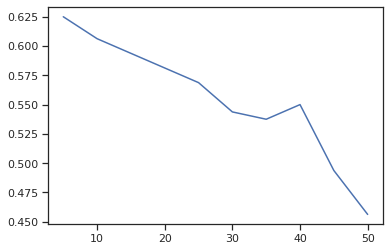

In [38]:

plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

**Оптимизация гиперпараметра через RandomizedSearch**

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(X_train, y_train)

CPU times: user 466 ms, sys: 0 ns, total: 466 ms
Wall time: 512 ms


Оптимальные параметры:

In [41]:

clf_rs.best_score_, clf_rs.best_params_

(0.625, {'n_neighbors': 5})

Изменение качества заполненных моделей в зависимости от K:

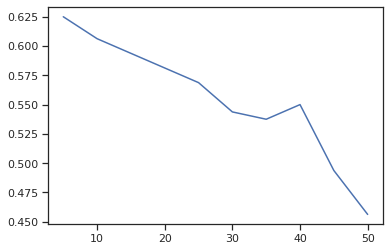

In [42]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

## Построение оптимальной модели

Оптимальное число ближайших соседей = 5

In [44]:
clf_o = KNeighborsClassifier(n_neighbors=5)
clf_o.fit(X_train, y_train)
target_o = clf_o.predict(X_test)
len(target_o), target_o

(54, array([5, 7, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 7,
        2, 1, 1, 1, 2, 2, 1, 1, 5, 6, 1, 1, 1, 2, 1, 1, 5, 1, 1, 7, 7, 1,
        7, 1, 1, 1, 2, 7, 2, 2, 1, 2]))

## Оценка качества исходной и оптимальной модели

**Метрика Accuracy**

In [45]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

Проверим для всех типов исходной модели:

In [46]:
accuracy_score(y_test, target_i)

0.6481481481481481

И оптимальной модели:

In [47]:

accuracy_score(y_test, target_o)

0.7222222222222222

Точность оптимальной модели (5 ближайших соседей) выше, чем в исходной модели (20).

Теперь проверим для каждого конкретного типа:

In [48]:
def accuracy_score_for_types(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    types = np.unique(y_true)
    res = dict()
    for t in types:
        temp_data_flt = df[df['t']==t]
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        res[t] = temp_acc
    return res

def print_accuracy_score_for_types(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = accuracy_score_for_types(y_true, y_pred)
    if len(accs)>0:
        print('Тип \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

Для исходной модели:

In [49]:
print_accuracy_score_for_types(y_test, target_i)

Тип 	 Accuracy
1 	 0.8260869565217391
2 	 0.5625
3 	 0.0
5 	 1.0
6 	 0.0
7 	 1.0


Для оптимальной модели:


In [50]:
print_accuracy_score_for_types(y_test, target_o)

Тип 	 Accuracy
1 	 0.8695652173913043
2 	 0.6875
3 	 0.0
5 	 1.0
6 	 1.0
7 	 1.0


**Метрика "Матрица ошибок"**

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

Для исходной модели:

In [52]:
confusion_matrix(y_test, target_i, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  4,  0,  0,  0,  0,  0],
       [ 0,  3,  9,  0,  0,  4,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  6]])

Визуально представим матрицу ошибок, показывающую количество верно и ошибочно классифицированных данных:

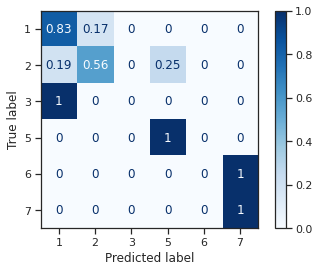

In [53]:
ConfusionMatrixDisplay.from_estimator(
        clf_i,
        X_test,
        y_test,
        display_labels=clf_i.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

Для оптимальной модели:

In [55]:

confusion_matrix(y_test, target_o, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  3,  0,  0,  0,  0,  0],
       [ 0,  3, 11,  0,  0,  2,  0,  0],
       [ 0,  6,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6]])

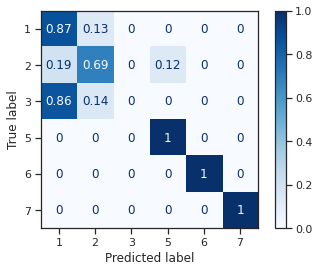

In [54]:
ConfusionMatrixDisplay.from_estimator(
        clf_o,
        X_test,
        y_test,
        display_labels=clf_o.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

Точность у оптимальной немного модели выше, чем у исходной.